In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

# 4 Evaluation Metrics for Classification

## 4.1 Evaluation Metrics: Overview

In [2]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(url)

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [3]:
# Slitting the data
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Storing target variables
y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

# Remove target from each df
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [4]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [5]:
# Initialize Model
dv = DictVectorizer(sparse=False)

dict_train = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(dict_train)

# Train model on training set
model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [6]:
# Comparinng Model to validation-set
dict_val = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(dict_val)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.801277501774308)

## 4.2 Accuracy & Dummy model
- Evaluate the model using different thresholds
- Check accuracy of dummy baselines

In [7]:
len(y_val)

1409

In [8]:
# Total amount of correct predictions
(y_val == churn_decision).sum()

np.int64(1129)

In [9]:
1129/1409

0.801277501774308

In [10]:
np.linspace(0,10,11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(y_val, y_pred >= 0.5)

0.801277501774308

In [13]:
# Testing different thresholds
thresholds = np.linspace(0,1,21)

scores = []

for t in thresholds:
    score = accuracy_score(y_true=y_val, y_pred=y_pred >= t)
    print('%.2f %.3f'%(t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.598
0.15 0.664
0.20 0.707
0.25 0.737
0.30 0.759
0.35 0.766
0.40 0.780
0.45 0.793
0.50 0.801
0.55 0.798
0.60 0.797
0.65 0.784
0.70 0.765
0.75 0.744
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


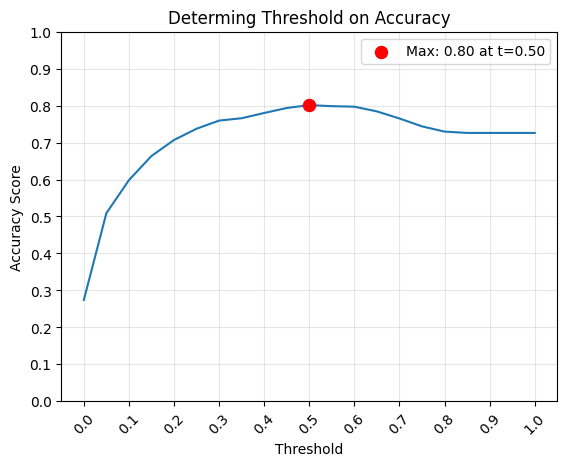

In [14]:
#Initial Plot
plt.plot(thresholds,scores)

# Finding the maximum score
max_score = max(scores)
max_threshold = thresholds[scores.index(max_score)]

# Add dot to the highest point
plt.scatter(
    x=max_threshold, 
    y=max_score,
    color='red', 
    s=75,
    zorder=5,
    label=f'Max: {max_score:.2f} at t={max_threshold:.2f}')

plt.xlabel('Threshold')
plt.ylabel('Accuracy Score')
plt.title('Determing Threshold on Accuracy')
plt.xticks(np.arange(0,1.1,0.1),rotation=45)
plt.yticks(np.arange(0,1.1,0.1))
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [15]:
from collections import Counter

In [16]:
# No values have a prediction score >= 1
Counter(y_pred >= .5)

Counter({np.False_: 1087, np.True_: 322})

In [17]:
Counter(y_val)

Counter({np.int64(0): 1023, np.int64(1): 386})

In [18]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [19]:
# look into class imbalance

## 4.3 Confusion Matrix
---
### Additional resources
- [Reference Lecture](https://www.youtube.com/watch?v=Jt2dDLSlBng&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=44)
- [Lecture Notes Official](https://knowmledge.com/2023/10/04/ml-zoomcamp-2023-evaluation-metrics-for-classification-part-3/)
    - [Suplemental Notes](https://github.com/marcosbenicio/data-science/blob/main/03Metrics/churn_metrics.ipynb)
<br>
&nbsp;
---

### Decision Rule for Binary Classification

$$ 
g(x_i) \rightarrow 
\begin{cases}
\text{churn} & \text{if } g(x_i) \geq t \\
\text{no churn} & \text{if } g(x_i) < t
\end{cases}
$$

**Classification Outcomes:**

$$
\begin{array}{ccc}
& g(x_i) & \\ negative
& \swarrow \quad \searrow & positive\\
g(x_i) < t & & g(x_i) \geq t \\
\text{Predict: NO CHURN} & & \text{Predict: CHURN} \\[1em]
\downarrow & & \downarrow \\[0.5em]
\begin{array}{c}
\text{Actual:} \\
\swarrow \quad \searrow \\
\text{Did not churn}\qquad 
\text{Did churn}
\end{array}
& &
\begin{array}{c}
\text{Actual:} \\
\swarrow \quad \searrow \\
\text{Did not churn} \qquad
\text{Did churn}
\end{array}
\end{array}
$$

**Where:**
- $g(x_i)$ : Model prediction for customer $i$
- $x_i$ : Customer features
- $t$ : Decision threshold
<br>
&nbsp;
---

In [ ]:
# Splitting Actual values 
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [43]:
t = 0.5

predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [44]:
predict_positive[:5]

array([False, False, False,  True, False])

In [45]:
actual_positive[:5]

array([False, False, False,  True, False])

In [ ]:
# Finding True Positive & Negatives
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [51]:
# Finding False Positive & Negatives
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [61]:
print(f'False Positive: {fp}\nFalse Negative: {fn}')

False Positive: 108
False Negative: 172


### Confusion Matrix

$$
\begin{array}{c|c|c}
& {PREDICTIONS} & \\
\hline
& g(x_i) < t & g(x_i) \geq t \\
& \text{NEGATIVE} & \text{POSITIVE} \\
\hline
\begin{array}{c}
\text{ACTUAL} \\
y = 0 \\
\text{NEGATIVE}
\end{array}
& \text{True Negative (TN)} & \text{False Positive (FP)} \\
\hline
\begin{array}{c}
\text{ACTUAL} \\
y = 1 \\
\text{POSITIVE}
\end{array}
& \text{False Negative (FN)} & \text{True Positive (TP)} \\
\end{array}
$$

**Where:**
- **True Negative (TN)**: Correctly predicted no churn
- **False Positive (FP)**: Predicted churn, but did not churn
- **False Negative (FN)**: Predicted no churn, but did churn  
- **True Positive (TP)**: Correctly predicted churn

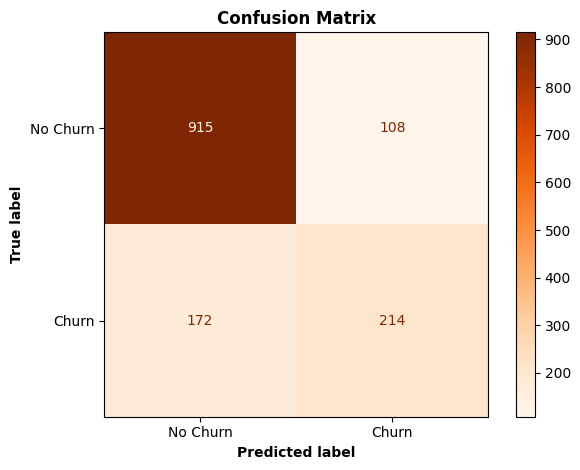

In [114]:
# Plotting confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(
    y_val, 
    predict_positive,
    display_labels=['No Churn', 'Churn'],
    cmap='Oranges'
)

# Bold the axis labels
disp.ax_.set_xlabel('Predicted label', fontweight='bold')
disp.ax_.set_ylabel('True label', fontweight='bold')

plt.title('Confusion Matrix', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()
plt.show()

In [74]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_true=y_val, y_pred=predict_positive)
cm

array([[915, 108],
       [172, 214]])

In [ ]:
(cm / cm.sum()).round(2)

array([[0.65, 0.08],
       [0.12, 0.15]])

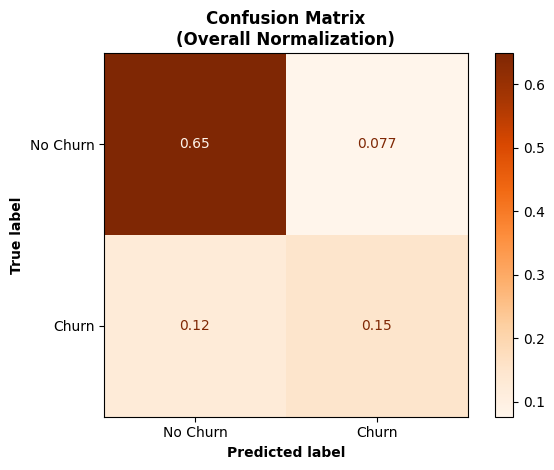

In [ ]:
# Plotting Overall Normalized confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Or change Method 2 to match Method 1:
disp = ConfusionMatrixDisplay.from_predictions(
    y_val, 
    predict_positive,
    display_labels=['No Churn', 'Churn'],
    cmap='Oranges',
    normalize='all'  # Changed from 'true' to 'all' -> 
)

# Bold the axis labels
disp.ax_.set_xlabel('Predicted label', fontweight='bold')
disp.ax_.set_ylabel('True label', fontweight='bold')

plt.title('Confusion Matrix\n(Overall Normalization)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

**Summary:**

- `normalize='true'`: Each row sums to 1 (shows recall perspective)
- `normalize='pred'`: Each column sums to 1 (shows precision perspective)
- `normalize='all'`: All cells sum to 1 (shows overall distribution)

## 4.4 Precision & Recall

### Precision:
- **Precision** = Of all the cases we predicted as positive, what fraction were actually positive?
<br>
&nbsp;
---

#### Formula:
$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} \rightarrow \frac{TP}{TP + FP}
$$
<br>
&nbsp;

---

**In the churn prediction context:**

- "Of all the customers we predicted would churn, what percentage actually churned?"

**Think of it as:**

- High precision = When we predict churn, we're usually right *(few false alarms)*
- Low precision = When we predict churn, we're often wrong *(many false alarms)*

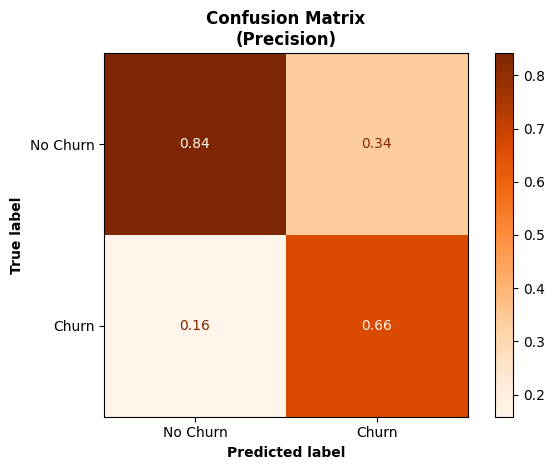

In [135]:
# Plotting Overall Normalized confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Or change Method 2 to match Method 1:
disp = ConfusionMatrixDisplay.from_predictions(
    y_val, 
    predict_positive,
    display_labels=['No Churn', 'Churn'],
    cmap='Oranges',
    normalize='pred'  # Changed from 'true' to 'all' -> 
)

# Bold the axis labels
disp.ax_.set_xlabel('Predicted label', fontweight='bold')
disp.ax_.set_ylabel('True label', fontweight='bold')

plt.title('Confusion Matrix\n(Precision)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [143]:
p = (tp / (tp + fp)).round(2)
p

np.float64(0.66)

### Recall:
- **Recall** = Of all the actual positive cases, what fraction did we correctly identify?
<br>
&nbsp;
---

#### Formula:
$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} = \frac{TP}{TP + FN}
$$
<br>
&nbsp;

---

**In the churn prediction context:**

- "Of all the customers who actually churned, what percentage did we correctly predict would churn?"

**Think of it as:**

- High recall = We catch most customers who will churn *(few missed cases)*
- Low recall = We miss many customers who will churn *(many missed cases)*

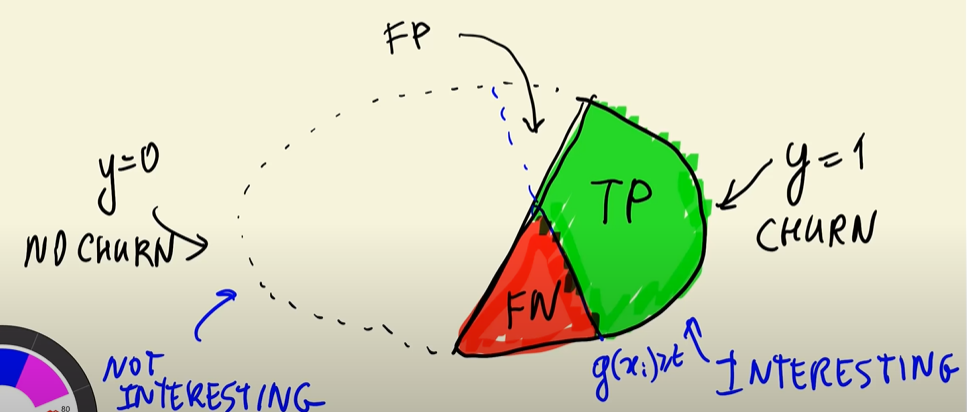

<br>
&nbsp;

---

In [147]:
tp + fp

np.int64(322)

In [ ]:
# Recall Score
r = tp / (tp + fn)
r

# 55%

np.float64(0.5544041450777202)

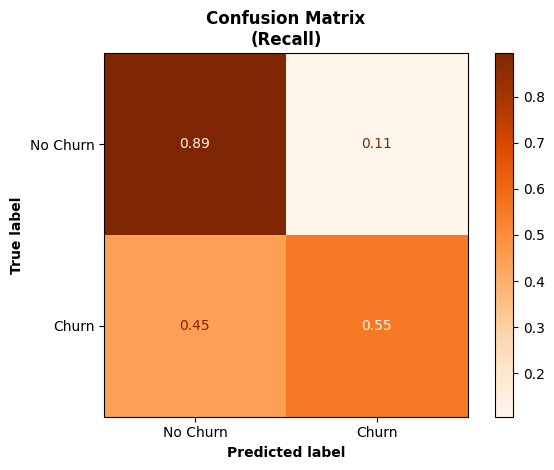

In [145]:
# Plotting Overall Normalized confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Or change Method 2 to match Method 1:
disp = ConfusionMatrixDisplay.from_predictions(
    y_val, 
    predict_positive,
    display_labels=['No Churn', 'Churn'],
    cmap='Oranges',
    normalize='true'  # Changed from 'true' to 'all' -> 
)

# Bold the axis labels
disp.ax_.set_xlabel('Predicted label', fontweight='bold')
disp.ax_.set_ylabel('True label', fontweight='bold')

plt.title('Confusion Matrix\n(Recall)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()